In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

In [55]:
df = pd.read_csv('./analy_2018-10-21_17.csv.gz')
df.head()

,payout,clickid,pubid,postback_datetime,sub_campid,publisher_payout,click_ip,is_valid_pb,campid,subid,source,is_fraud,pubpb_filter,fraud_note,date,geo,click_datetime
0,0.420,7a699dec-6266-4617-8692-177add7470a5,10236,2018-10-21T00:05:00Z,NaN,0.42,114.4.215.252,True,56780210,544537,152,0,0,ok,2018-10-21,ID,2018-10-21T00:03:11Z
1,0.288,631de21c-7cd7-4e5e-a45b-2ea51222ff39,10236,2018-10-21T00:05:02Z,NaN,0.43,114.142.169.38,True,58630048,544537,87,1,900,blacklist,2018-10-21,ID,2018-10-20T23:38:26Z
2,0.900,882e8b6c-57d4-4eaf-a6e1-9c4e13ec14b0,10408,2018-10-21T00:05:04Z,NaN,1.37,172.88.34.138,True,56658221,1020_SUBID2369,201,0,0,ok,2018-10-21,US,2018-10-20T23:43:21Z
3,1.420,7bb9425e-0c85-42b0-8e7d-a2262155413c,10250,2018-10-21T00:05:04Z,NaN,1.84,121.100.87.211,True,55319427,3367,184,0,0,ok,2018-10-21,KR,2018-10-21T00:03:22Z
4,0.630,003e8f8d-9172-4881-9d65-8d0db5b5dfbc,10549,2018-10-21T00:05:01Z,NaN,0.63,198.50.215.177,True,59088041,NaN,140,0,0,ok,2018-10-21,CA,2018-10-20T23:45:58Z


In [56]:
dd=df[df['is_valid_pb'] == True].groupby(['date'])['payout','is_fraud','is_valid_pb'].aggregate(np.sum)
dd['payout'] = dd['payout'].round(decimals=1)
dd['fraud_p'] = (dd['is_fraud']/dd['is_valid_pb']).round(decimals=2)
date_len = len(dd.index)
dd

,payout,is_fraud,is_valid_pb,fraud_p
date,,,,
2018-10-05,135161.1,25927,175365.0,0.15
2018-10-06,129680.3,24378,164078.0,0.15
2018-10-07,135370.4,25749,171002.0,0.15
2018-10-08,135836.7,26228,171132.0,0.15
2018-10-09,135018.4,27224,172516.0,0.16
2018-10-10,136781.9,27039,172581.0,0.16
2018-10-11,143522.7,24315,174607.0,0.14
2018-10-12,150771.4,22774,173734.0,0.13
2018-10-13,161966.5,23481,185316.0,0.13


In [65]:
total_payout = 1000*date_len
dd = df.groupby(['pubid'])['payout','is_fraud','is_valid_pb'].aggregate(np.sum)
dd = dd.query('payout > {}'.format(total_payout)).sort_values(by=['payout'], ascending=False)
dd.index.values
dd = df[df['pubid'].isin(dd.index.values)]
dd

,payout,clickid,pubid,postback_datetime,sub_campid,publisher_payout,click_ip,is_valid_pb,campid,subid,source,is_fraud,pubpb_filter,fraud_note,date,geo,click_datetime
0,0.4200,7a699dec-6266-4617-8692-177add7470a5,10236,2018-10-21T00:05:00Z,NaN,0.4200,114.4.215.252,True,56780210,544537,152,0,0,ok,2018-10-21,ID,2018-10-21T00:03:11Z
1,0.2880,631de21c-7cd7-4e5e-a45b-2ea51222ff39,10236,2018-10-21T00:05:02Z,NaN,0.4300,114.142.169.38,True,58630048,544537,87,1,900,blacklist,2018-10-21,ID,2018-10-20T23:38:26Z
2,0.9000,882e8b6c-57d4-4eaf-a6e1-9c4e13ec14b0,10408,2018-10-21T00:05:04Z,NaN,1.3700,172.88.34.138,True,56658221,1020_SUBID2369,201,0,0,ok,2018-10-21,US,2018-10-20T23:43:21Z
3,1.4200,7bb9425e-0c85-42b0-8e7d-a2262155413c,10250,2018-10-21T00:05:04Z,NaN,1.8400,121.100.87.211,True,55319427,3367,184,0,0,ok,2018-10-21,KR,2018-10-21T00:03:22Z
5,1.1400,7521b2d2-439e-42e3-bd87-0e2ca1f0eba2,10408,2018-10-21T00:05:03Z,NaN,1.1400,172.58.121.142,True,57162591,1074_466322,87,0,0,ok,2018-10-21,US,2018-10-21T00:03:28Z
7,0.2100,c9224fed-ad33-4b3d-b3b0-998f9e17bf9b,10266,2018-10-21T00:05:04Z,NaN,0.2100,223.228.148.10,True,58529435,300110,184,0,0,ok,2018-10-21,IN,2018-10-20T18:11:21Z
8,0.5110,a0365194-01ef-41f9-aa61-53a79a9aef8a,10541,2018-10-21T00:05:05Z,NaN,0.6100,140.213.12.23,True,59209285,aa5204341f2a50747dadf1c80fa6fd92,162,0,900,ok,2018-10-21,ID,2018-10-21T00:02:45Z
9,0.2640,0f85cbd3-5083-4bd7-80c9-a3722f2e745e,10236,2018-10-21T00:05:02Z,NaN,0.3900,37.127.125.130,True,57165511,544537,87,0,0,ok,2018-10-21,SA,2018-10-21T00:03:08Z
10,0.4800,30f42537-468e-4659-b38e-d7bdf5feda76,10236,2018-10-21T00:05:03Z,NaN,0.4800,113.183.189.13,True,56780168,544537,152,0,900,ok,2018-10-21,VN,2018-10-21T00:04:25Z
12,0.1000,8ac53012-76ad-487d-bedc-bb25d823a283,10367,2018-10-21T00:05:08Z,NaN,0.1000,107.4.3.156,True,39844840,20344790,83,0,900,ok,2018-10-21,US,2018-10-20T22:14:16Z


In [72]:
dt=pd.pivot_table(dd, values=['payout'], index=['date'], columns=['pubid'], aggfunc='sum', margins=False,fill_value=0)
dt

payout                                                    \
pubid            10217       10219        10224        10236       10250   
date                                                                       
2018-10-05  3800.83610  6365.01600   9583.40480  10666.23200  4451.92445   
2018-10-06  4099.39830  6787.24400  10400.91780   9626.93460  3978.28725   
2018-10-07  4271.29060  6805.45850   9686.09210   9585.65930  4146.68580   
2018-10-08  3837.16190  6956.68070  11177.35880   8923.44430  4373.56280   
2018-10-09  3831.77490  6218.38680  10751.47945   9563.43890  4455.26170   
2018-10-10  3841.77590  7894.09080  10761.91200   8136.73500  4668.93717   
2018-10-11  4281.45910  7741.75190  11124.56560   8782.68355  4857.43603   
2018-10-12  4598.35620  9612.56470  10715.17235   9497.74925  5100.55495   
2018-10-13  5326.65605  8971.16380  10999.63700   8813.83550  4868.81460   
2018-10-14  4437.82240  7939.34940   9968.43220   7808.10410  4258.73320   
2018-10-15  3740.20840  8847.66700   9473.79520   7757.95450  4459.73375   
2018-10-16  3762.45900  8307.28590   9044.95590   8176.53220  4046.08560   
2018-10-17  3906.38195  8383.44100   9623.77840   7716.83790  4035.61065   
2018-10-18  3896.75740  8319.95445   9220.18240   7755.52330  4727.18440   
2018-10-19  3527.71870  9945.92120   8848.13440   8423.25300  4286.40550   
2018-10-20  4394.20200  9970.64740   9115.42235   9405.42600  4570.56250   
2018-10-21  4522.38480  9463.82180   9229.31810   9260.88690  4559.73525   

                                                                      \
pubid           10266      10288        10291      10292       10294   
date                                                                   
2018-10-05  1179.5610  6609.3105   8331.89285  2148.0077  4280.80360   
2018-10-06  1068.2135  7206.6375   7055.76820  2024.5555  4031.16980   
2018-10-07  1285.9599  7814.7975   7828.87580  2203.3089  4118.85790   
2018-10-08  1029.3457  8200.0330   7965.41990  2165.4968  4249.14690   
2018-10-09  1007.6499  6475.4855   7699.11030  2093.3840  4422.43060   
2018-10-10  1110.4941  6906.3650   6906.49480  1801.4726  4715.26558   
2018-10-11   987.4127  8337.9065   8096.67515  1510.9486  4902.52673   
2018-10-12  1246.5326  7652.9772   8753.34730  1503.3168  5072.32715   
2018-10-13  1443.2375  8985.2052  10693.16575  1528.3109  5308.42465   
2018-10-14  1251.1448  9254.6534   8407.00765  1286.4337  4619.72695   
2018-10-15  1276.1410  8422.6035   6847.71405  1303.5030  4338.08310   
2018-10-16  1220.8318  7021.9355   6838.38360  1374.7858  4041.35465   
2018-10-17  1083.7881  6743.3246   6291.06330  1755.0649  3971.27000   
2018-10-18  1141.5307  9036.3653   6348.07620  1314.4053  4516.69980   
2018-10-19  1281.4121  6270.6952   7666.64415  1565.3534  4267.11830   
2018-10-20  1385.1918  7499.2321   8138.12020  1660.2322  4429.21270   
2018-10-21  1353.8164  7033.5625   7446.96005  2140.3400  4446.33965   

              ...                                                    \
pubid         ...          10425       10436      10454       10460   
date          ...                                                     
2018-10-05    ...      2163.4610  2521.63710  1398.4063  2638.32470   
2018-10-06    ...      2030.3205  2613.93070  1344.0280  3087.75440   
2018-10-07    ...      2053.7960  2959.86450  1252.4855  2787.26100   
2018-10-08    ...      1915.5640  2610.97270  1288.1380  2787.13470   
2018-10-09    ...      2349.5920  2657.19990  1652.6410  2593.34570   
2018-10-10    ...      3166.2030  2710.48180  1779.3370  2869.30940   
2018-10-11    ...      3756.3810  2813.21850  2364.2020  2510.01510   
2018-10-12    ...      3759.0880  2838.92530  1838.4130  2411.53900   
2018-10-13    ...      2874.9050  3215.77810  1642.1820  3120.22700   
2018-10-14    ...      1952.1670  2915.31160  1660.6340  2265.94935   
2018-10-15    ...      1950.0670  2429.15880  1061.3753  2423.01830   
2018-10-16    ...      1629.9580  2497.64780  1137.6057  228

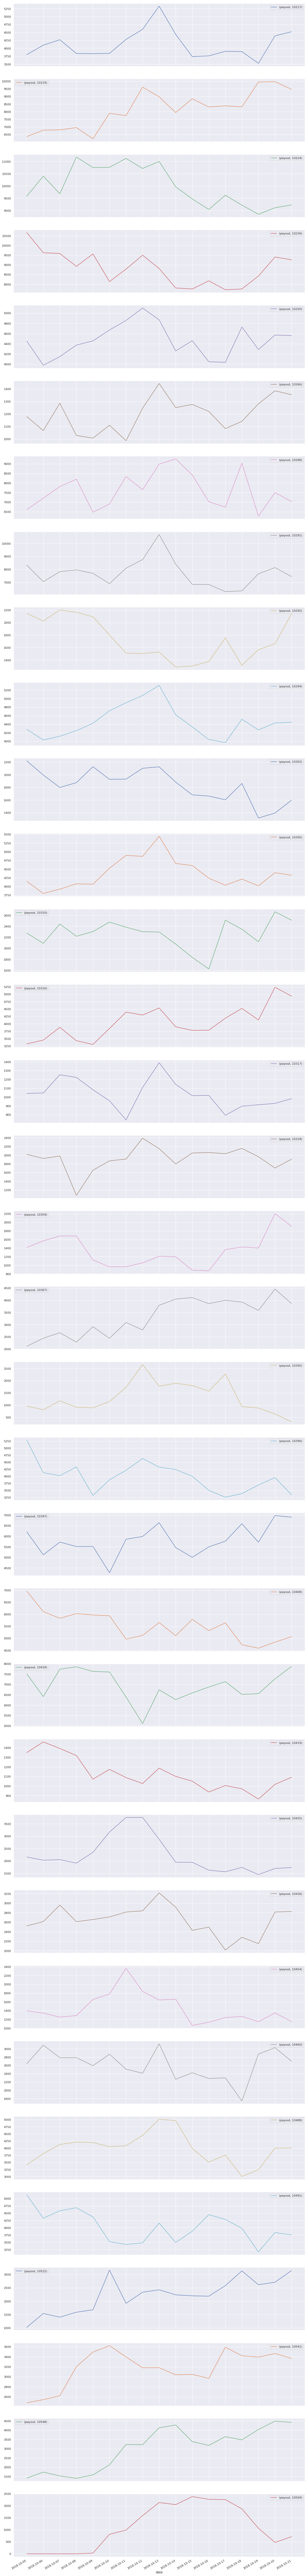

In [129]:
#with pd.plotting.plot_params.use('x_compat', True):
#    for i in dt.columns.values:
#        dt[i].plot();
        #dt[i].rolling(window=7).mean().plot();     
dt.plot(subplots=True, grid=True, figsize=(20, 200), use_index=True, xticks=range(0, len(dt.index.values)));

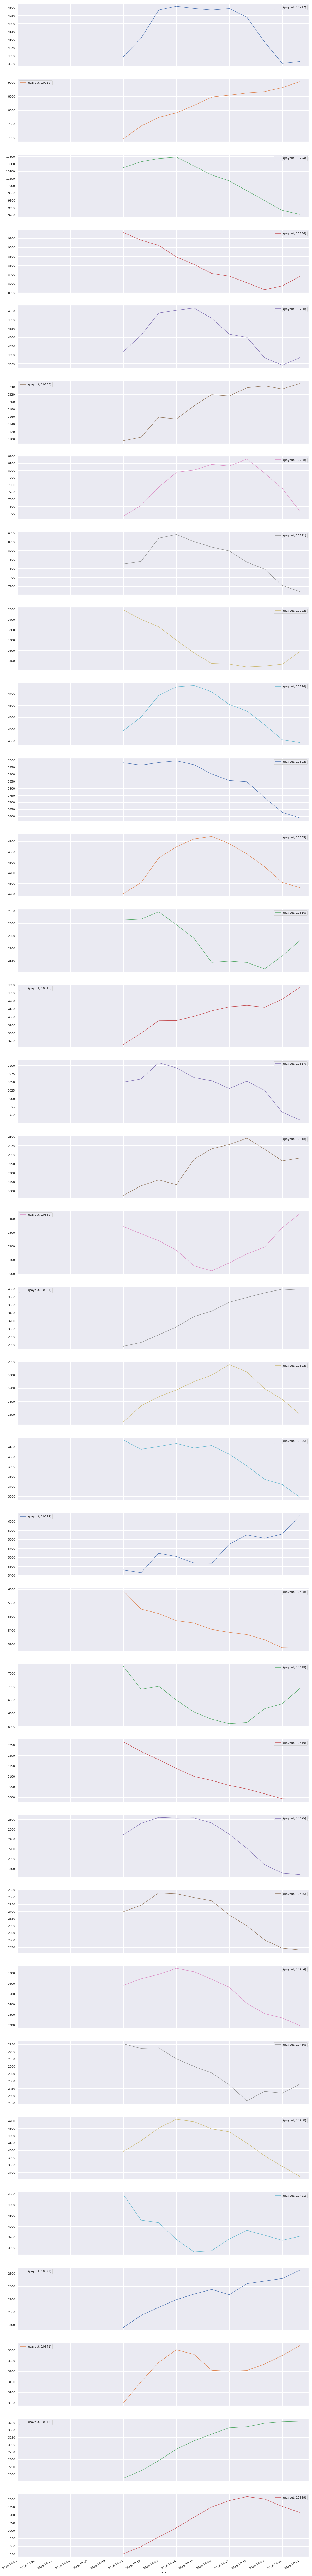

In [138]:
dt.rolling(window=7).mean().plot(subplots=True, grid=True, figsize=(20, 200), use_index=True, xticks=range(0, len(dt.index.values)));

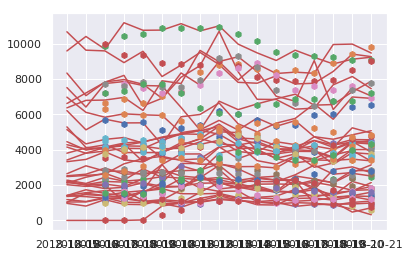

In [134]:
import matplotlib.pyplot as plt
x=dt.index
y1 = dt
y2 = dt.rolling(window=3).mean()

#plt.plot(x,y1,'r',x,y2,'h',);
dt.plot(subplots=True, grid=True, figsize=(20, 200), use_index=True, xticks=range(0, len(dt.index.values)));

In [122]:
c_date = '2018-10-17'
total_payout = 100
fraud_low_weight = 0.8
fraud_high_weight = 1.2

dd = df[df['date']==c_date]
#dd = df

In [123]:
fraud_avg = dd['is_fraud'].aggregate(np.sum)/dd['is_valid_pb'].size
fraud_avg

0.07392577097554787

In [124]:
dd = dd.groupby(['pubid'])['payout','is_fraud','is_valid_pb'].aggregate(np.sum)
dd['fraud_p'] = (dd['is_fraud']/dd['is_valid_pb']).round(decimals=2)

In [125]:
dd.query('payout > {} & fraud_p >= {}'.format(total_payout, fraud_avg*fraud_high_weight)).sort_values(by=['payout'], ascending=False)

,payout,is_fraud,is_valid_pb,fraud_p
pubid,,,,
10236,7716.83790,1113,12591.0,0.09
10367,3999.13530,709,6510.0,0.11
10217,3906.38195,277,3097.0,0.09
10522,2579.81750,122,693.0,0.18
10460,2300.37080,263,2204.0,0.12
10436,2016.89710,286,2125.0,0.13
10292,1755.06490,284,2304.0,0.12
10302,1603.88620,266,3033.0,0.09
10266,1083.78810,130,1019.0,0.13


In [126]:
dd.query('payout > {} & fraud_p <= {}'.format(total_payout, fraud_avg*fraud_low_weight)).sort_values(by=['payout'], ascending=False)

,payout,is_fraud,is_valid_pb,fraud_p
pubid,,,,
10418,7135.24845,278,5270.0,0.05
10288,6743.32460,148,3088.0,0.05
10488,3760.58780,114,3935.0,0.03
10548,3648.81150,16,1324.0,0.01
10396,3258.63670,166,3203.0,0.05
10310,2511.32540,331,6503.0,0.05
10359,1365.86900,4,530.0,0.01
10557,686.14700,20,818.0,0.02
10272,457.61180,24,519.0,0.05


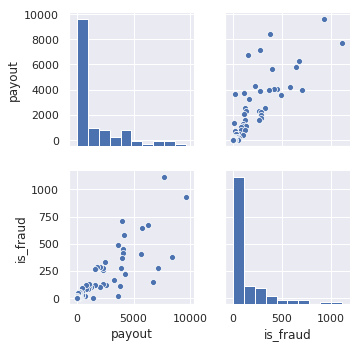

In [111]:
sns.pairplot(data[['payout', 'is_fraud']])

In [78]:
sns.boxplot(x='payout', y='fraud_p', data=data)

ValueError: Could not interpret input 'fraud_p'